# Libraries installation

In [1]:
#pip install svgling polyglot pyicu pycld2 morfessor langdetect transformers

# Libaries loading

In [3]:
# Tokenization
from nltk.tokenize import word_tokenize

# BoWs
import nltk
from collections import Counter

# Preprocessing
from nltk.corpus import stopwords

# Stemming and lemmatization
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Gensim
from gensim.corpora.dictionary import Dictionary

from gensim.models.tfidfmodel import TfidfModel

# Tf-idf (Scikit-Learn)
from sklearn.feature_extraction.text import TfidfVectorizer

# Named Entity Recognition
import svgling

# SpaCy and dependencies parsing
import spacy

# Polyglot
from polyglot.text import Text

# Vectorization and classification
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Sentiment analysis
from textblob import TextBlob

# Language detection
from langdetect import detect_langs

# Embeddings
from gensim.models import Word2Vec

# Topic modeling
from gensim import corpora, models

# Text generation
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

ModuleNotFoundError: No module named 'polyglot'

# Components downloading

In [ ]:
# Tokenization, BoWs, and preprocessing
nltk.download('punkt')

# Preprocessing
nltk.download('stopwords')

# Named Entity Recognition
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

# SpaCy
nlp = spacy.load('en_core_web_sm')

# Polyglot
!polyglot download embeddings2.es
!polyglot download ner2.es

# Lemmatization
nltk.download('wordnet')

# Text generation
tokenizer = GPT2Tokenizer.from_pretrained("gpt2-medium")
model_tg = GPT2LMHeadModel.from_pretrained("gpt2-medium")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


[polyglot_data] Downloading package embeddings2.es to
[polyglot_data]     /root/polyglot_data...
[polyglot_data] Downloading package ner2.es to /root/polyglot_data...


[nltk_data] Downloading package wordnet to /root/nltk_data...


# Tokenizers

In [ ]:
# Other tokenizers
#sent_tokenize : tokenize a document into sentences
#regexp_tokenize : tokenize a string or document based on aregular expression pattern
#TweetTokenizer : special class just for tweet tokenization, allowing you to separate hashtags, mentions and lots of exclamation point

word_tokenize("Hi there! I don't know")

['Hi', 'there', '!', 'I', 'do', "n't", 'know']

# BoWs

In [ ]:
text = """The cat is in the box. The cat likes the box.
The box is over the cat."""

# Extract tokens
tokens = word_tokenize(text)

tokens

['The',
 'cat',
 'is',
 'in',
 'the',
 'box',
 '.',
 'The',
 'cat',
 'likes',
 'the',
 'box',
 '.',
 'The',
 'box',
 'is',
 'over',
 'the',
 'cat',
 '.']

In [ ]:
# Most common words
counter = Counter(tokens)

counter.most_common(2)

[('The', 3), ('cat', 3)]

# Preprocessing

In [ ]:
text = """The cat is in the box. The cat likes the box.
The box is over the cat."""

# Extract only alphanumeric tokens and lowercase them
tokens = [w for w in word_tokenize(text.lower()) if w.isalpha()]

tokens

['the',
 'cat',
 'is',
 'in',
 'the',
 'box',
 'the',
 'cat',
 'likes',
 'the',
 'box',
 'the',
 'box',
 'is',
 'over',
 'the',
 'cat']

In [ ]:
# Remove the stowords
no_stops = [t for t in tokens if t not in stopwords.words('english')]

no_stops

['cat', 'box', 'cat', 'likes', 'box', 'box', 'cat']

In [ ]:
# Most common words
counter = Counter(no_stops)

counter.most_common(2)

[('cat', 3), ('box', 3)]

# Gensim

In [ ]:
my_documents = ['The movie was about a spaceship and aliens.',
                'I really liked the movie!',
                'Awesome action scenes, but boring characters.',
                'The movie was awful! I hate alien films.',
                'Space is cool! I liked the movie.',
                'More space films, please!'
]

In [ ]:
# Extract tokens for each sentence in the list and lowercase them
tokenized_docs = [word_tokenize(doc.lower()) for doc in my_documents]

In [ ]:
tokenized_docs

[['the', 'movie', 'was', 'about', 'a', 'spaceship', 'and', 'aliens', '.'],
 ['i', 'really', 'liked', 'the', 'movie', '!'],
 ['awesome', 'action', 'scenes', ',', 'but', 'boring', 'characters', '.'],
 ['the', 'movie', 'was', 'awful', '!', 'i', 'hate', 'alien', 'films', '.'],
 ['space', 'is', 'cool', '!', 'i', 'liked', 'the', 'movie', '.'],
 ['more', 'space', 'films', ',', 'please', '!']]

In [ ]:
# Make a dictionary from the extracted tokens
dictionary = Dictionary(tokenized_docs)

dictionary.token2id

{'.': 0,
 'a': 1,
 'about': 2,
 'aliens': 3,
 'and': 4,
 'movie': 5,
 'spaceship': 6,
 'the': 7,
 'was': 8,
 '!': 9,
 'i': 10,
 'liked': 11,
 'really': 12,
 ',': 13,
 'action': 14,
 'awesome': 15,
 'boring': 16,
 'but': 17,
 'characters': 18,
 'scenes': 19,
 'alien': 20,
 'awful': 21,
 'films': 22,
 'hate': 23,
 'cool': 24,
 'is': 25,
 'space': 26,
 'more': 27,
 'please': 28}

In [ ]:
# Make a corpus from the extracted tokens
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(5, 1), (7, 1), (9, 1), (10, 1), (11, 1), (12, 1)],
 [(0, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)],
 [(0, 1),
  (5, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1)],
 [(0, 1), (5, 1), (7, 1), (9, 1), (10, 1), (11, 1), (24, 1), (25, 1), (26, 1)],
 [(9, 1), (13, 1), (22, 1), (26, 1), (27, 1), (28, 1)]]

In [ ]:
# Make a tf_idf analysis from the corpus
tfidf = TfidfModel(corpus)

tfidf[corpus[1]]

[(5, 0.1746298276735174),
 (7, 0.1746298276735174),
 (9, 0.1746298276735174),
 (10, 0.29853166221463673),
 (11, 0.47316148988815415),
 (12, 0.7716931521027908)]

# Scikit-Learn tf-idf

In [ ]:
#vect = TfidfVectorizer(max_features=100).fit(tweets.text)
#X = vect.transform(tweets.text)
#X_df = pd.DataFrame(X_txt.toarray(), columns=vect.get_feature_names())
#X_df.head()

# Named Entity Recognition

In [ ]:
sentence = '''In New York, I like to ride the Metro to
visit MOMA and some restaurants rated
well by Ruth Reichl.'''

# Extract tokens
tokenized_sent = nltk.word_tokenize(sentence)

In [ ]:
# Extrapolate the tags from the extracted tokens
tagged_sent = nltk.pos_tag(tokenized_sent)

tagged_sent

[('In', 'IN'),
 ('New', 'NNP'),
 ('York', 'NNP'),
 (',', ','),
 ('I', 'PRP'),
 ('like', 'VBP'),
 ('to', 'TO'),
 ('ride', 'VB'),
 ('the', 'DT'),
 ('Metro', 'NNP'),
 ('to', 'TO'),
 ('visit', 'VB'),
 ('MOMA', 'NNP'),
 ('and', 'CC'),
 ('some', 'DT'),
 ('restaurants', 'NNS'),
 ('rated', 'VBN'),
 ('well', 'RB'),
 ('by', 'IN'),
 ('Ruth', 'NNP'),
 ('Reichl', 'NNP'),
 ('.', '.')]

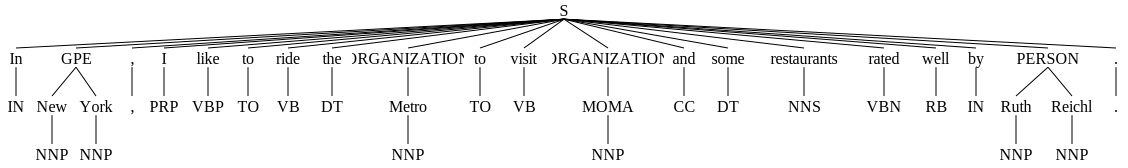

In [ ]:
nltk.ne_chunk(tagged_sent)

# SpaCy

In [ ]:
# Extract the entities from the sentence
doc = nlp("""Berlin is the capital of Germany;
and the residence of Chancellor Angela Merkel.""")

doc.ents

(Berlin, Germany, Angela Merkel)

In [ ]:
# Print the entities and their tags
for word in doc.ents:
    print("{}: {}".format(word, word.label_))

Berlin: GPE
Germany: GPE
Angela Merkel: PERSON


In [ ]:
doc[0], doc[0].ancestors

(Berlin, <generator at 0x7bc6301de200>)

# Polyglot

In [ ]:
text = """El presidente de la Generalitat de Cataluña,
Carles Puigdemont, ha afirmado hoy a la alcaldesa
de Madrid, Manuela Carmena, que en su etapa de
alcalde de Girona (de julio de 2011 a enero de 2016)
hizo una gran promoción de Madrid."""

# Extract the entities and print them with their tags
ptext = Text(text)
ptext.entities

[I-ORG(['Generalitat', 'de']),
 I-LOC(['Generalitat', 'de', 'Cataluña']),
 I-PER(['Carles', 'Puigdemont']),
 I-LOC(['Madrid']),
 I-PER(['Manuela', 'Carmena']),
 I-LOC(['Girona']),
 I-LOC(['Madrid'])]

# Vectorization and classification

In [ ]:
data = {
    'plot': [
        "In a galaxy far, far away, a young farmer discovers he's the last hope to defeat an evil empire.",
        "A computer programmer discovers a reality-bending matrix controlled by machines.",
        "A love story set during World War II between an American soldier and a British woman.",
        "Two hobbits embark on a journey to destroy a powerful ring.",
        "In a dystopian future, a chosen one is set to compete in deadly games broadcasted for the entire nation.",
        "A historical drama set in the medieval period about the power struggles of nobles.",
        "A group of astronauts embark on a journey to find a new habitable planet.",
        "A detective in modern-day Los Angeles tries to solve a mysterious murder."
    ],
    'Sci-Fi': [1, 1, 0, 0, 1, 0, 1, 0]
}

df = pd.DataFrame(data)

In [ ]:
# Vectorization step
y = df['Sci-Fi']
X_train, X_test, y_train, y_test = train_test_split(df['plot'],
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 16)

count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)

In [ ]:
# Classification step
nb_classifier = MultinomialNB()

nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)

In [ ]:
# Accuracy
metrics.accuracy_score(y_test, pred)

0.5

In [ ]:
# Confusion matrix
metrics.confusion_matrix(y_test, pred, labels = [0,1])

array([[1, 0],
       [1, 0]])

# Sentiment analysis

In [ ]:
# Also Vader Sentiment?
text = "Today was a good day."

In [ ]:
my_valence = TextBlob(text)

my_valence.sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

# Language detection

In [ ]:
foreign = 'Este libro ha sido uno de los mejores libros que he leido.'

detect_langs(foreign)

[es:0.9999952474681633]

# Stemming

In [ ]:
porter = PorterStemmer()

porter.stem('wonderful')

'wonder'

In [ ]:
porter.stem('Today is a wonderful day!')

'today is a wonderful day!'

In [ ]:
tokens = word_tokenize('Today is a wonderful day!')
stemmed_tokens = [porter.stem(token) for token in tokens]
stemmed_tokens

['today', 'is', 'a', 'wonder', 'day', '!']

In [ ]:
from nltk.stem.snowball import SnowballStemmer

In [ ]:
DutchStemmer = SnowballStemmer("dutch")
DutchStemmer.stem("beginnen")

'beginn'

# Lemmatization

In [ ]:
WNlemmatizer = WordNetLemmatizer()
WNlemmatizer.lemmatize('wonderful', pos = 'a')

'wonderful'

# Word embeddings

In [ ]:
sentences = [["cat", "say", "meow"], ["dog", "say", "woof"]]
model = Word2Vec(sentences, min_count=1)
model.wv['cat']

array([-0.00713902,  0.00124103, -0.00717672, -0.00224462,  0.0037193 ,
        0.00583312,  0.00119818,  0.00210273, -0.00411039,  0.00722533,
       -0.00630704,  0.00464722, -0.00821997,  0.00203647, -0.00497705,
       -0.00424769, -0.00310898,  0.00565521,  0.0057984 , -0.00497465,
        0.00077333, -0.00849578,  0.00780981,  0.00925729, -0.00274233,
        0.00080022,  0.00074665,  0.00547788, -0.00860608,  0.00058446,
        0.00686942,  0.00223159,  0.00112468, -0.00932216,  0.00848237,
       -0.00626413, -0.00299237,  0.00349379, -0.00077263,  0.00141129,
        0.00178199, -0.0068289 , -0.00972481,  0.00904058,  0.00619805,
       -0.00691293,  0.00340348,  0.00020606,  0.00475375, -0.00711994,
        0.00402695,  0.00434743,  0.00995737, -0.00447374, -0.00138926,
       -0.00731732, -0.00969783, -0.00908026, -0.00102275, -0.00650329,
        0.00484973, -0.00616403,  0.00251919,  0.00073944, -0.00339215,
       -0.00097922,  0.00997913,  0.00914589, -0.00446183,  0.00

# Topic modeling

In [ ]:
dictionary = corpora.Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(text) for text in tokenized_docs]
ldamodel = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.086*"!" + 0.086*"," + 0.085*"space" + 0.085*"films"')
(1, '0.095*"the" + 0.095*"movie" + 0.054*"was" + 0.054*"liked"')
(2, '0.091*"." + 0.064*"i" + 0.064*"!" + 0.063*"movie"')


# Dependencies parsing

In [ ]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("The quick brown fox jumps over the lazy dog.")
for token in doc:
    print(token.text, token.dep_, token.head.text)

The det fox
quick amod fox
brown amod fox
fox nsubj jumps
jumps ROOT jumps
over prep jumps
the det dog
lazy amod dog
dog pobj over
. punct jumps


# Text generation

In [ ]:
# Assuming you have already defined and loaded the tokenizer and model
input_text = "Once upon a time"
input_ids = tokenizer.encode(input_text, return_tensors="pt")

# Create attention mask
attention_mask = torch.ones(input_ids.shape, dtype=torch.long)

output = model_tg.generate(input_ids,
                           attention_mask=attention_mask,
                           max_length=100,
                           num_return_sequences=5,
                           temperature=0.7,
                           do_sample=True,
                           pad_token_id=tokenizer.eos_token_id)


In [ ]:
len(output)

5

In [ ]:
print(tokenizer.decode(output[0]))

Once upon a time, the ancient city of Atlantis was a thriving metropolis of wealth and power. The world's first city-state, it was ruled by a royal family whose vast wealth came from the ancient gold and silver mines. But when Atlantis was invaded by invaders from another planet, a powerful warrior named Poseidon's crew destroyed the city. Poseidon and his fellow gods were banished back into the underworld, but Poseidon's family did survive and became one of the greatest lords of the underworld


# Intentions recognition

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Sample data
phrases = ["open the door", "tell me the time", "close the app"]
labels = ["command", "request", "command"]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(phrases)
clf = MultinomialNB().fit(X, labels)

# Predict intent
print(clf.predict(vectorizer.transform(["what's the time?"])))

['command']


# Automatic Summarization

In [ ]:
!pip install bert-extractive-summarizer

In [ ]:
from summarizer import Summarizer

In [ ]:
text = """
The solar system consists of the Sun and the objects that orbit it, either directly or indirectly. Of the objects that orbit the Sun directly, the largest are the eight planets, with the remainder being smaller objects, the dwarf planets and small Solar System bodies. Of the objects that orbit the Sun indirectly—the natural satellites—two are larger than the smallest planet, Mercury.

The solar system can be divided into the inner and the outer solar systems. The inner solar system contains the Sun, Mercury, Venus, Earth, and Mars. The main asteroid belt lies between the orbits of Mars and Jupiter. The planets of the outer solar system are Jupiter, Saturn, Uranus, and Neptune.

The solar system also includes more than 200 known natural satellites, with more being discovered each year. Beyond Neptune lies the Kuiper Belt, and finally the Oort Cloud, which may extend as far as a light-year.

The Sun is the star at the center of the solar system. It is a nearly perfect sphere of hot plasma, heated to incandescence by nuclear fusion reactions in its core, radiating the energy mainly as visible light and infrared radiation. It is by far the most important source of energy for life on Earth. Its diameter is about 1.39 million kilometers, or 109 times that of Earth. Its mass is about 330,000 times that of Earth, and it accounts for about 99.86% of the total mass of the solar system.
"""

In [ ]:
model = Summarizer()

In [ ]:
print(model(text))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The solar system consists of the Sun and the objects that orbit it, either directly or indirectly. Beyond Neptune lies the Kuiper Belt, and finally the Oort Cloud, which may extend as far as a light-year. The Sun is the star at the center of the solar system.


# Coherence analysis

In [ ]:
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from nltk.tokenize import word_tokenize

# Sample data
documents = [
    "The sky is blue.",
    "The sun is bright.",
    "The rain is refreshing.",
    "I love sunny days.",
    "Clouds block the sun.",
    "Rainbows appear after rain."
]

# Tokenize and create a dictionary
texts = [word_tokenize(doc.lower()) for doc in documents]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Build an LDA model
lda_model = LdaModel(corpus, num_topics=2, id2word=dictionary, passes=15)

# Evaluate coherence
coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
coherence = coherence_model.get_coherence()

print(f"Coherence Score: {coherence}")

Coherence Score: 0.4288194163743063


# Anaphora resolution

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')
doc = nlp("Anna went to the store. She bought a book, then she went to her office")
for token in doc:
    if "she" in token.text.lower():
        print(token.text, "-->", token.head.text)

She --> bought
she --> went


# text segmentation

In [ ]:
import nltk

In [ ]:
text = """
The solar system consists of the Sun and the objects that orbit it, either directly or indirectly. Of the objects that orbit the Sun directly, the largest are the eight planets, with the remainder being smaller objects, the dwarf planets and small Solar System bodies. Of the objects that orbit the Sun indirectly—the natural satellites—two are larger than the smallest planet, Mercury.

The solar system can be divided into the inner and the outer solar systems. The inner solar system contains the Sun, Mercury, Venus, Earth, and Mars. The main asteroid belt lies between the orbits of Mars and Jupiter. The planets of the outer solar system are Jupiter, Saturn, Uranus, and Neptune.

The solar system also includes more than 200 known natural satellites, with more being discovered each year. Beyond Neptune lies the Kuiper Belt, and finally the Oort Cloud, which may extend as far as a light-year.

The Sun is the star at the center of the solar system. It is a nearly perfect sphere of hot plasma, heated to incandescence by nuclear fusion reactions in its core, radiating the energy mainly as visible light and infrared radiation. It is by far the most important source of energy for life on Earth. Its diameter is about 1.39 million kilometers, or 109 times that of Earth. Its mass is about 330,000 times that of Earth, and it accounts for about 99.86% of the total mass of the solar system.
"""

In [ ]:
sentences = nltk.sent_tokenize(text)

for sentence in sentences:
    print(sentence + "\n")


The solar system consists of the Sun and the objects that orbit it, either directly or indirectly.

Of the objects that orbit the Sun directly, the largest are the eight planets, with the remainder being smaller objects, the dwarf planets and small Solar System bodies.

Of the objects that orbit the Sun indirectly—the natural satellites—two are larger than the smallest planet, Mercury.

The solar system can be divided into the inner and the outer solar systems.

The inner solar system contains the Sun, Mercury, Venus, Earth, and Mars.

The main asteroid belt lies between the orbits of Mars and Jupiter.

The planets of the outer solar system are Jupiter, Saturn, Uranus, and Neptune.

The solar system also includes more than 200 known natural satellites, with more being discovered each year.

Beyond Neptune lies the Kuiper Belt, and finally the Oort Cloud, which may extend as far as a light-year.

The Sun is the star at the center of the solar system.

It is a nearly perfect sphere of h

# Topic detection